<a href="https://colab.research.google.com/github/akshar1277/Pytorch_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Pytorch workflow






In [1]:
what_were_covering={
    1:'data preapare and load',
    2:'build model',
    3:'fitting the model to data(training)',
    4:'making predictions and evaluting a model',
    5:'saving and loading a model',
    6:'putting it all together'
}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch verison
torch.__version__


'2.1.0+cu121'

### 1.Data (preparing and loading)

Data can be almost anything in machine learning

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numeraical represantation
2. Build pattern from numeriacal data

To showcase this let;s create some *known* data using linear regression formula.
We'll use a linear regression formula to make a straight line with known parameter


In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X, y


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [4]:
len(X),len(y)

(50, 50)

###splitting data into training and testing

In [5]:
train_split=int(0.8 * len(X))
train_split

40

In [6]:
x_train,y_train=X[:train_split],y[:train_split]
x_test,y_test=X[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)



(40, 40, 10, 10)

### visualise data


In [7]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None
                     ):
  plt.figure(figsize=(10,7))
# training data
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing  data")

  if predictions is not None:
    # ploat the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":12})

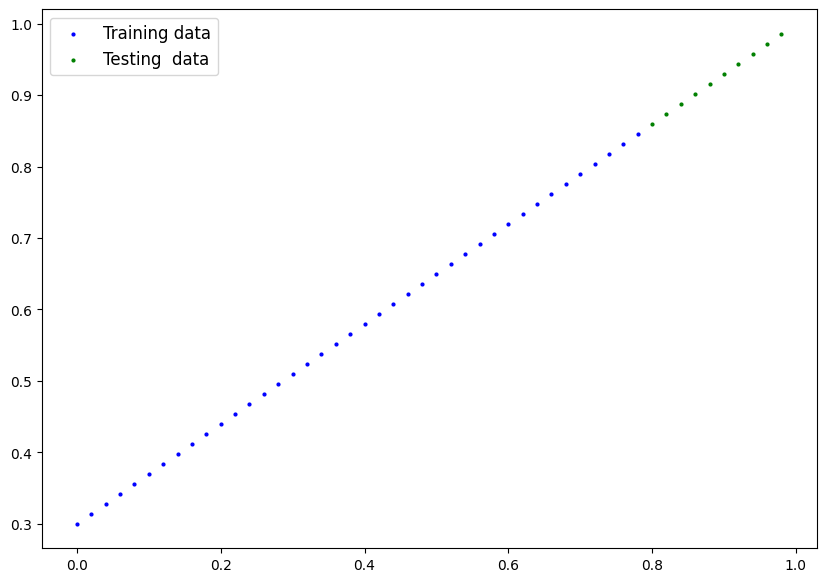

In [8]:
plot_predictions()

### 2. Build  model

what our model does:
* start with random values (weight & bias)
*Look at training data and adjust the random values to better represent the ideal values (the weight and bias values we used to create the data)

How does it do so?
1. gradiant desent
2. backpropogation

In [9]:
from torch import nn

class LinearRegressionModel(nn.Module): #-> nn is base class for all neural network modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,
                                       dtype=torch.float32))

  #Forward method to define the computation in the model
  def forward(self,x: torch.Tensor)->torch.Tensor:  #->x is input data
    return self.weights * x + self.bias


 ### checking the contents of our pytorch model


 so we can checkout our model parameters or what's inside our model using .parameters()


In [65]:
torch.manual_seed(42) #create random seed

#create an instance of the model
model_0 = LinearRegressionModel()

#check out parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# lsit named parametes
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

### Making predication using torch.inference_mode()

To check our model's predictive power let's see how well it predicts y_test based on x_test

when we pass data through our model ,it's going to run it through the forward() method

In [66]:
# makke predictions with model
with torch.inference_mode():#inference mode shut the grad_fn . becasue we are not doing training we dont need gradiant.
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [67]:
y_test


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

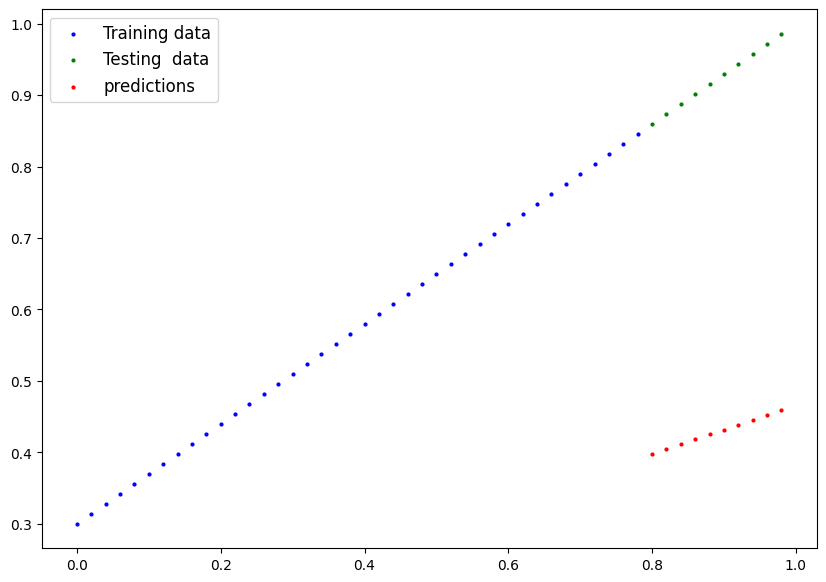

In [68]:
plot_predictions(predictions=y_preds )

### 3.Train Model

The whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters.

or in other words from a poor representation of the data to a better representatin of the data

one way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note : loss function may also be called cost function or criterion
* **Loss function:** mesuaremnt of how far prediction from actual value

* **Optimizer:** Takes into account the loss of a model;s parameter and adjusts the model;s parameter to improve the loss function  

And specifically for pytorch we need
->training loop
->testing loop

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [69]:
# setup loss function

loss_fn=nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr=learning rate =possibly the most important hyperparameter you can set






### Building a training loop and testing loop in pytorch

A couple of things we need in train loop:
0. Loop through the data
1. forward pass (this involves data moving through our model's `forward()` functions
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwardthrough the network to calculate the gradients of each of the parameters of our model with respect to the loss.(**backpropagation**)
5. Optimizer step - use the optimizer to adjuct our model's parameters to try and improve the loss (**gradiant decent**)



In [70]:
torch.manual_seed(42)
# epoch is one loop through the data.. (this is a hyperparamer because we've set it by us)
epochs=100

# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()  #train mode in pytorch sets all parameter that require gradients to require gradients


  # 1. Forward pass
  y_pred=model_0(x_train)

  #2. calculate loss
  loss= loss_fn(y_pred,y_train)
  # print(loss)
  #3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backprapogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5 . step the optimizer
  optimizer.step() #by default how the optimizer chages will acculumate throgh the loop so.. we have to zero them above in step 3


  model_0.eval()#turns off gradient traking which is not need for testing (dropout/batchnom layes)

  with torch.inference_mode():#this turns of gradient tracking & a couple more things behind the scens
    # 1. Do the Froward pass
    test_pred=model_0(x_test)

    # 2. calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    #



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819


In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

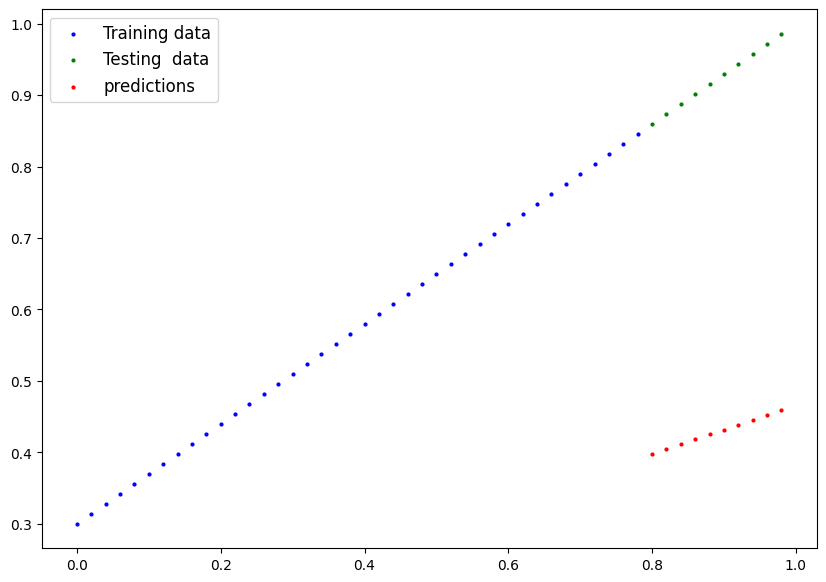

In [72]:
with torch.inference_mode():
  y_preds_new=model_0(x_test)

plot_predictions(predictions=y_preds);


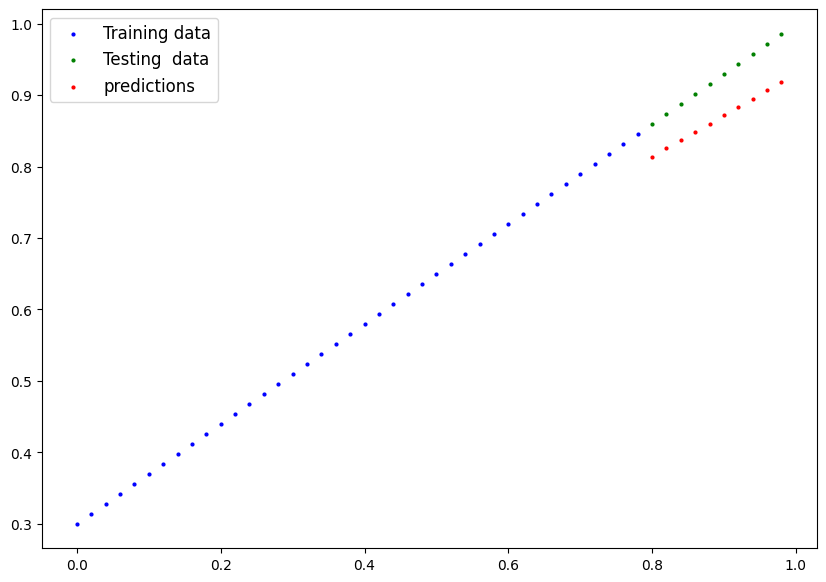

In [73]:
plot_predictions(predictions=y_preds_new);